In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from astroquery.gaia import Gaia

In [7]:
class BrownDwarf(object):
    def __init__(self, ra, dec, distance, name, temp=False):
        ''' 
        Brown Dwarf object
        Attributes
        ----------
        ra          : float, degrees
        dec         : float, degrees
        distance    : float, in kpc
        name        : string, name of object
        temp        : float (optional), in K
        '''
        self.ra=ra
        self.dec=dec
        self.dist=distance
        self.name = name
        self.pos=SkyCoord(ra=self.ra*u.degree,dec=self.dec*u.degree, distance=self.dist*u.pc,  frame='icrs')

        if temp:
            self.temp=temp

    def get_xyz(self):
        gal=self.pos.transform_to('galactic')
        x = gal.cartesian.x.to(u.pc).value
        y = gal.cartesian.y.to(u.pc).value
        z = gal.cartesian.z.to(u.pc).value
        print(f'l is {gal.l}')
        print(f'b is {gal.b}')
        print(f'distance is{self.dist}')
        self.x = x
        self.y = y
        self.z = z

    
    
    def plot_bd(self, plot_stars = True, **kwargs ):   
        # intialize plot 
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.view_init(elev = 0, azim=125)  
        label_pad = 10
        ax.set_xlabel('X [pc]',labelpad = label_pad)
        ax.set_ylabel('Y [pc]',labelpad = label_pad)
        ax.set_zlabel('Z [pc]',labelpad = label_pad)

        if plot_stars:
            query = """
                    SELECT TOP 1000 source_id, ra, dec, l, b, phot_g_mean_mag
                    FROM gaiadr3.gaia_source
                    WHERE phot_g_mean_mag < 12
                    """
            job = Gaia.launch_job_async(query)
            results = job.get_results()
            l = results['l']
            b = results['b']
            stars = SkyCoord(l=l, b=b, frame='galactic')
            ax.scatter(stars.cartesian.x, stars.cartesian.y, stars.cartesian.z, color = 'black', alpha = 0.005, marker = ',',
                       label = 'Nearby Gaia Stars')


        # static sun plot
        sc_static = ax.scatter(0,0,0, color="yellow", label="Sun")

        
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_zlim(-10,10)
        for side in ['top', 'bottom', 'left', 'right']:
            ax.spines[side].set(lw=2.0)
        

        x,y,z = self.x, self.y, self.dist
        ax_object = ax.scatter(x,y,z, color = 'red', label = self.name)
        ax.legend()
        plt.show()




In [8]:
bd=BrownDwarf(162,-53,2,'my_bd')

In [9]:
bd.get_xyz()

l is 284.86592131741827 deg
b is 5.486783631906607 deg
distance is2


INFO: Query finished. [astroquery.utils.tap.core]


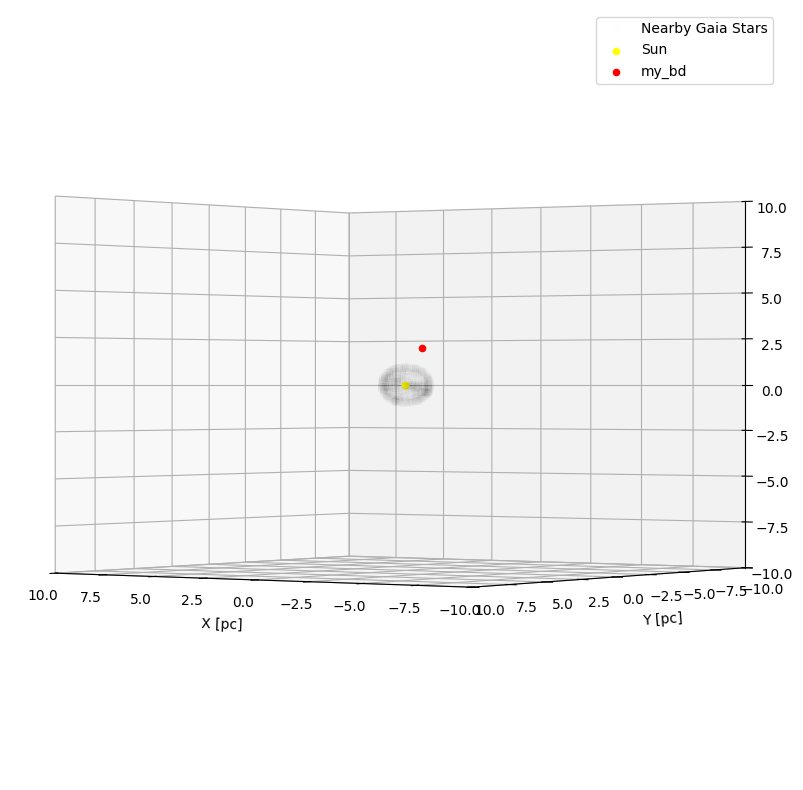

In [10]:
bd.plot_bd()

In [8]:
bd.get_xyz()

l is 284.86592131741827 deg
b is 5.486783631906607 deg
distance is2
